In [2]:
## Linear Regression

In [3]:
## DATA PREPARATION

In [11]:
## Dataset Refering here : 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.shape

(11914, 16)

In [7]:
# Shuffling data ; to split data as per validation framework
df = df.sample(frac=1).reset_index(drop=True)
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,Porsche,911,2017,premium unleaded (required),420.0,6.0,MANUAL,all wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,1715,122600
1,Nissan,Leaf,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,101,126,2009,29010
2,Saab,9-3,2011,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,4.0,Luxury,Compact,Wagon,31,21,376,30330


In [8]:
str_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
str_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in str_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [10]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,porsche,911,2017,premium_unleaded_(required),420.0,6.0,manual,all_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,122600
1,nissan,leaf,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,101,126,2009,29010
2,saab,9-3,2011,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,luxury,compact,wagon,31,21,376,30330


In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
## EXPLORATORY DATA ANALYSIS

In [13]:
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,porsche,911,2017,premium_unleaded_(required),420.0,6.0,manual,all_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,122600
1,nissan,leaf,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,101,126,2009,29010
2,saab,9-3,2011,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,luxury,compact,wagon,31,21,376,30330
3,honda,civic,2017,regular_unleaded,158.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,40,28,2202,18740
4,volkswagen,cabrio,2001,regular_unleaded,115.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,26,20,873,21475


In [14]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

make
['porsche' 'nissan' 'saab' 'honda' 'volkswagen' 'ford' 'subaru' 'dodge'
 'lincoln' 'chevrolet']
48

model
['911' 'leaf' '9-3' 'civic' 'cabrio' 'new_beetle' 'expedition' 'legacy'
 'ram_150' 'mkz']
914

year
[2017 2015 2011 2001 2008 2016 1992 1998 2003 2014]
28

engine_fuel_type
['premium_unleaded_(required)' 'electric' 'premium_unleaded_(recommended)'
 'regular_unleaded' 'flex-fuel_(unleaded/e85)' 'diesel'
 'flex-fuel_(unleaded/natural_gas)'
 'flex-fuel_(premium_unleaded_recommended/e85)'
 'flex-fuel_(premium_unleaded_required/e85)' nan]
10

engine_hp
[420.  nan 210. 158. 115. 150. 365. 175. 230. 260.]
356

engine_cylinders
[ 6.  0.  4.  5.  8. 12. 10.  3. nan 16.]
9

transmission_type
['manual' 'direct_drive' 'automatic' 'automated_manual' 'unknown']
5

driven_wheels
['all_wheel_drive' 'front_wheel_drive' 'rear_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['luxury,high-performance' 'hatchback' 'luxury' nan 'luxury,hybrid'
 'crossover' 

In [15]:
## Distribution of msrp (target) variable

In [16]:
!pip install matplotlib

In [17]:
!pip install seaborn

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

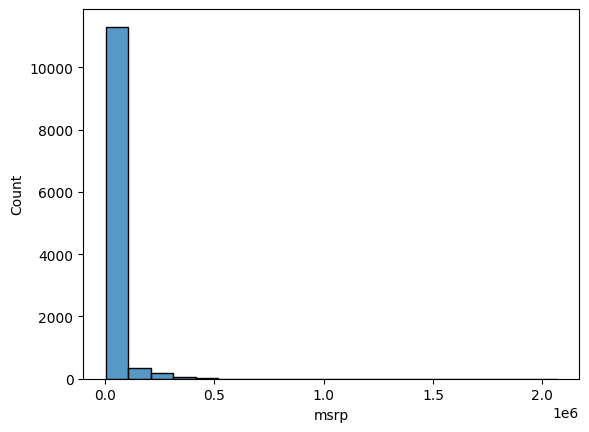

In [19]:
sns.histplot(df.msrp,bins=20)

<Axes: xlabel='msrp', ylabel='Count'>

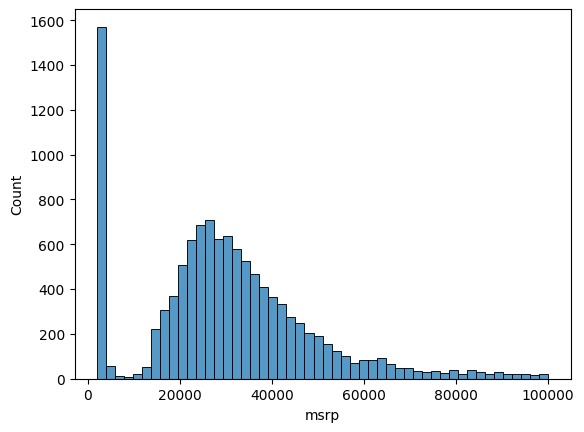

In [20]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

In [21]:
import numpy as np
np.log([1, 10, 100, 1000, 10000, 100000])

array([ 0.        ,  2.30258509,  4.60517019,  6.90775528,  9.21034037,
       11.51292546])

In [22]:
np.log(0)

C:\Users\user\AppData\Local\Temp\ipykernel_11340\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [23]:
np.log(-2)

C:\Users\user\AppData\Local\Temp\ipykernel_11340\4202958139.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-2)


np.float64(nan)

In [24]:
## this is like 1 + values and then doing log ; we can't perform log(0) or log( negative values) hence we are adding min 1 
np.log1p([0, 10, 100, 1000, 10000, 100000])

array([ 0.        ,  2.39789527,  4.61512052,  6.90875478,  9.21044037,
       11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

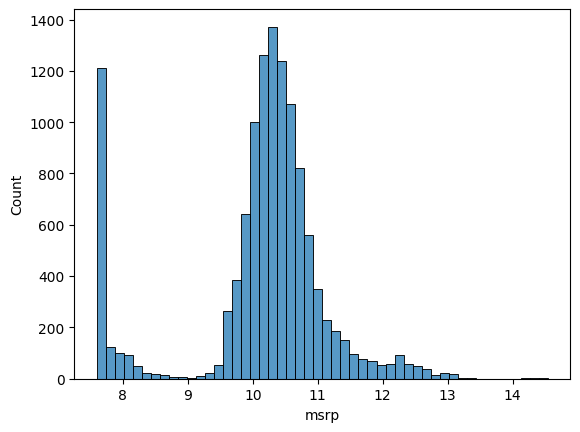

In [25]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs,bins=50)

In [26]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [27]:
df[df['number_of_doors'].isna()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
317,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,107,101,1391,71000
1083,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,high-performance",large,sedan,105,92,1391,134500
2429,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,105,102,1391,79500
6267,ferrari,ff,2013,premium_unleaded_(required),651.0,12.0,automated_manual,all_wheel_drive,NaN,"exotic,high-performance",large,coupe,16,11,2774,295000
9565,tesla,model_s,2016,electric,NaN,0.0,direct_drive,rear_wheel_drive,NaN,"exotic,performance",large,sedan,100,97,1391,74500
11834,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,NaN,"exotic,performance",large,sedan,101,98,1391,66000


In [28]:
df[df['engine_fuel_type'].isna()]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
689,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,17199
5112,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,18499
5144,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,20199


In [29]:
df[df['model'] == 'verona']

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
689,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,17199
5112,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,18499
5144,suzuki,verona,2004,NaN,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,20199
5258,suzuki,verona,2006,regular_unleaded,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,18299
6818,suzuki,verona,2005,regular_unleaded,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,18,481,17549
7987,suzuki,verona,2005,regular_unleaded,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,18,481,20549
8774,suzuki,verona,2005,regular_unleaded,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,18,481,21049
11114,suzuki,verona,2005,regular_unleaded,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,18,481,19349
11620,suzuki,verona,2006,regular_unleaded,155.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,25,17,481,20299


In [30]:
## IMPLEMENTATION OF VALIDATION FRAMEWORK

In [31]:
len(df)

11914

In [32]:
train_len = int(len(df)*0.6)
val_len = int(len(df)*0.2)
test_len = int(len(df)*0.2)

train_len , val_len , test_len , train_len + val_len + test_len
train_len = len(df) - val_len - test_len
train_len , val_len , test_len , train_len + val_len + test_len

(7150, 2382, 2382, 11914)

In [33]:
df_train = df.iloc[:train_len]
len(df_train)

7150

In [34]:
df_val = df[train_len:train_len + val_len]
len(df_val)

2382

In [35]:
df_test = df[train_len+val_len:train_len + val_len + test_len]
len(df_test)

2382

In [36]:
if len(df_train) + len(df_val) + len(df_test) == len(df):
    print("Matching")

Matching


In [37]:
df_train= df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
type(df_train)

pandas.core.frame.DataFrame

In [39]:
# convert target variable to log value
np.log1p(df_train.msrp)

0       11.716690
1       10.275430
2       10.319926
3        9.838469
4        9.974691
          ...    
7145    10.348846
7146     7.715124
7147    10.964761
7148    10.553231
7149    10.010097
Name: msrp, Length: 7150, dtype: float64

In [40]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [41]:
y_train

array([11.71669046, 10.27543035, 10.31992557, ..., 10.96476136,
       10.55323128, 10.01009729], shape=(7150,))

In [42]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [43]:
df_train.head(2)           ## MAKE SURE TARGET VARIABLE IS NOT PRESENT IN THE TRAINING DATASET

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,porsche,911,2017,premium_unleaded_(required),420.0,6.0,manual,all_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715
1,nissan,leaf,2015,electric,NaN,0.0,direct_drive,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,101,126,2009


In [156]:
## LINEAR REGRESSION

In [157]:
xi = [453 , 11 , 86] # features from one car 

In [158]:
w0 = 0
w = [1 , 1, 1]

In [51]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [52]:
linear_regression(xi)

12.312

In [53]:
xi = [453 , 11 , 86] # features from one car 
w0 = 7.17
w = [0.01 , 0.04, 0.002]
print(linear_regression(xi))
np.expm1(linear_regression(xi))

12.312


np.float64(222347.2221101062)

In [54]:
x = np.array([1,2, 3])
y = np.array([4, 5, 6])
np.dot(x,y)

np.int64(32)

In [60]:
w

[0.01, 0.04, 0.002]

In [55]:
## 2.6 Linear Regression vector form

In [94]:
def dot(xi,w):
    result = 0.0
    n = len(xi)
    for j in range(n):
        result = result + xi[j] * w[j]
    return result   

In [95]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [96]:
w_n = [w0] + w
w_n

[7.17, 0.01, 0.04, 0.002]

In [97]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_n)

In [98]:
linear_regression(xi)

12.312

In [99]:
x1 = [1, 453 , 11 , 86]
x2 = [1, 148,  24, 1385]
x3 = [1, 132,25,2031]
X = [x1,x2,x3]
X = np.array(X)
X

array([[   1,  453,   11,   86],
       [   1,  148,   24, 1385],
       [   1,  132,   25, 2031]])

In [100]:
w_n

[7.17, 0.01, 0.04, 0.002]

In [101]:
X.dot(w_n)

array([12.312, 12.38 , 13.552])

In [102]:
## Training a linear regression Model